[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/examples/gallery_example.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz

## Escherichia Phage

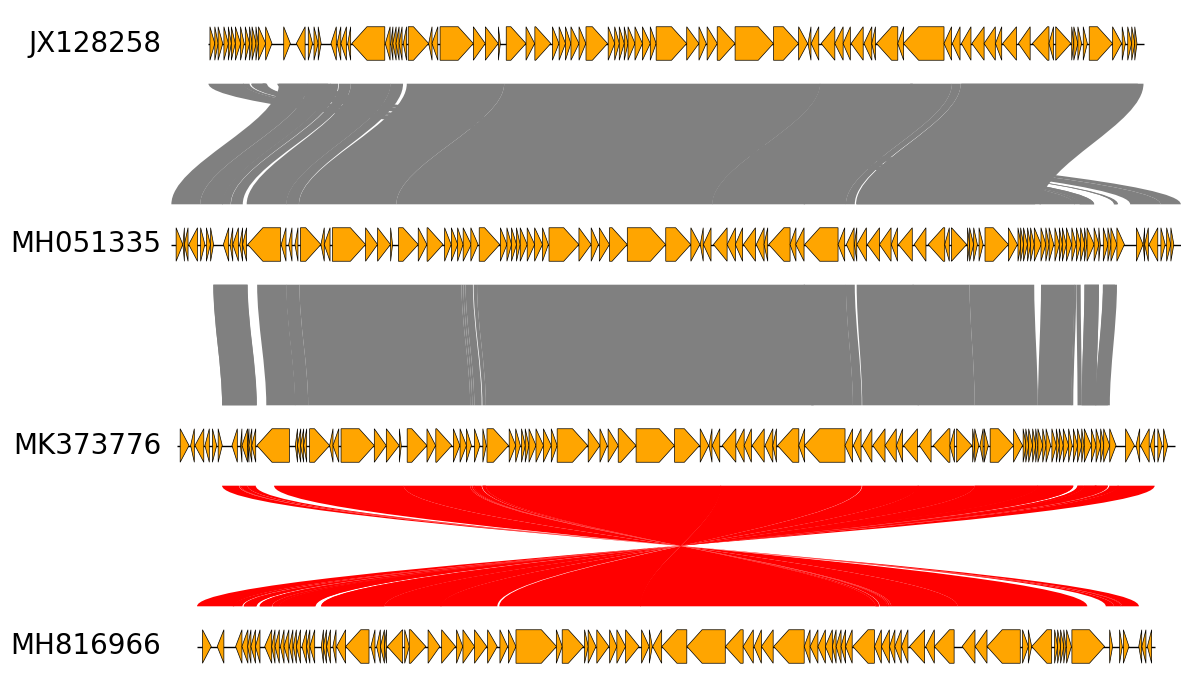

In [2]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=12,
    feature_track_ratio=0.5,
    align_type="center",
)

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, size_ratio=0.5, arrow_shaft_ratio=1.0, linewidth=0.5)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, curve=True, alpha=1.0)

fig = gv.plotfig()


## Eriwinia Phage

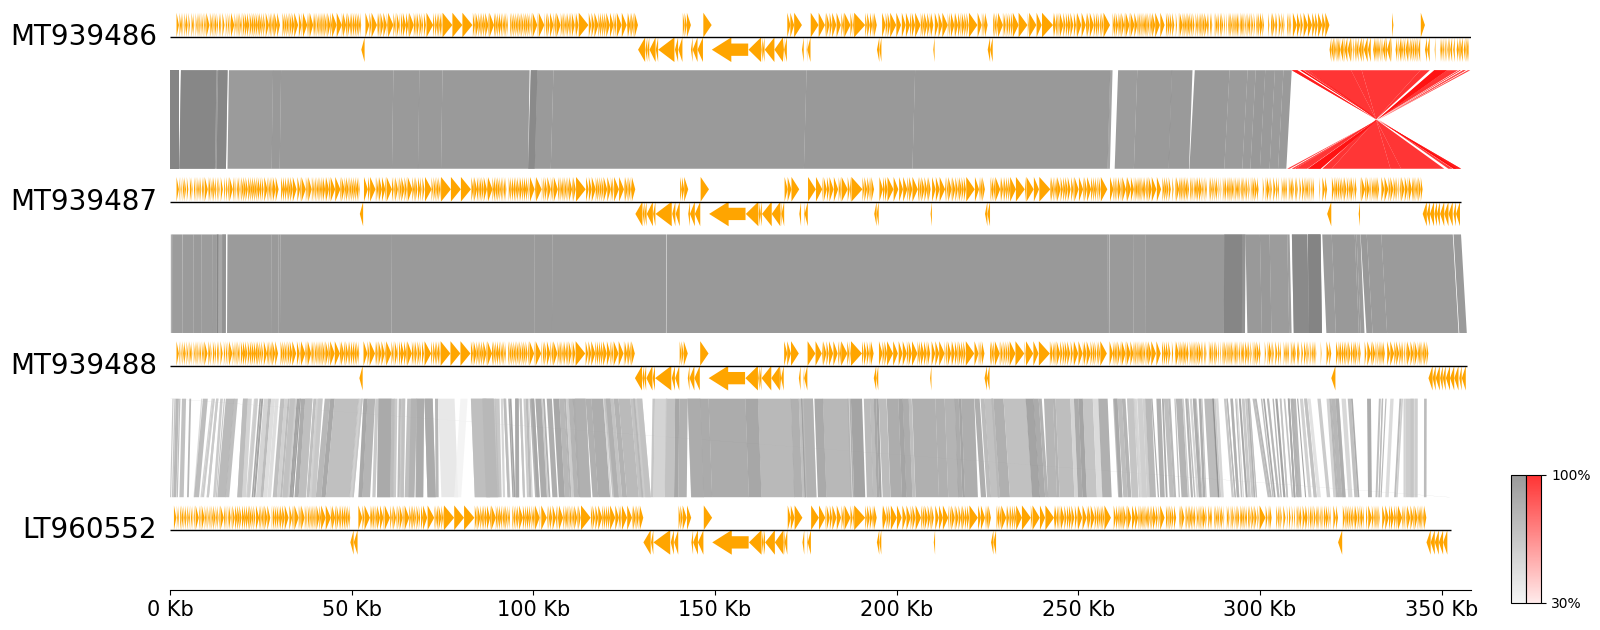

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_track_height=0.8,
    feature_track_ratio=0.5,
    tick_track_ratio=0.3,
    tick_style="axis",
)

gbk_files, links = load_dataset("erwinia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, plotstyle="arrow")

min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, vmin=min_identity)

fig = gv.plotfig()

gv.set_colorbar(fig, vmin=min_identity)


## Enterobacteria Phage

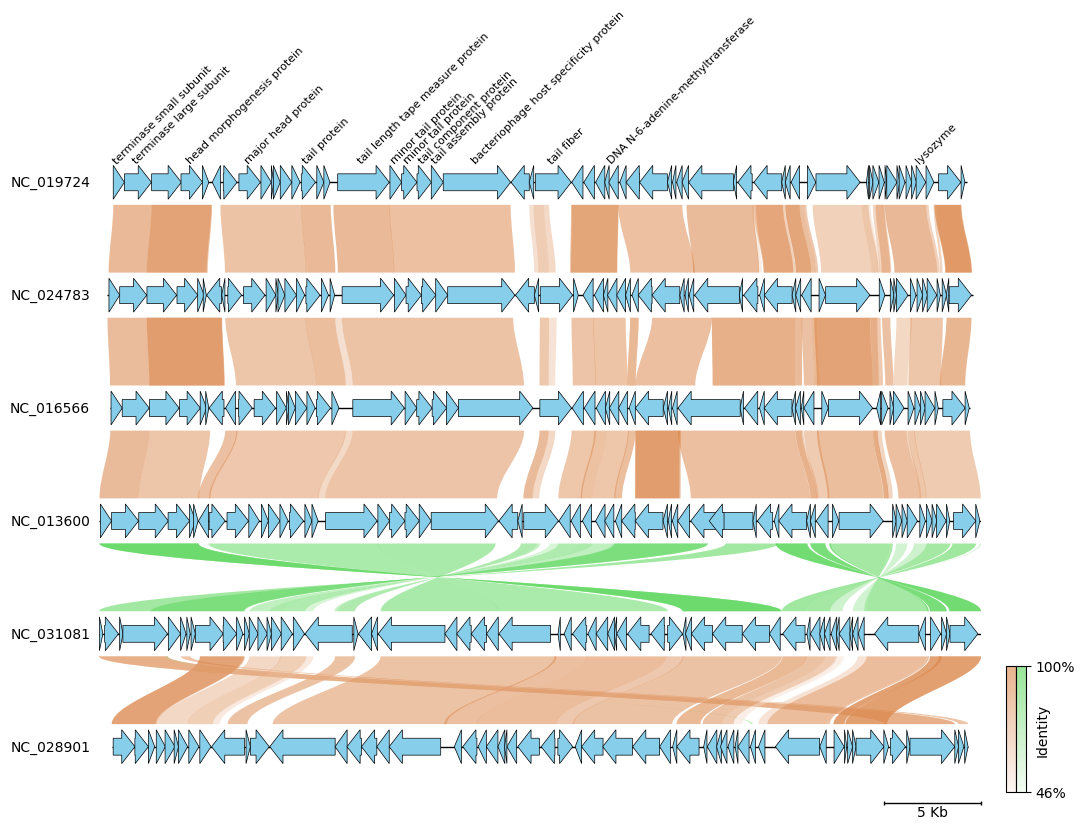

In [4]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=10,
    fig_track_height=0.7,
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    align_type="center",
    tick_style="bar",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("enterobacteria_phage")
for idx, gbk_file in enumerate(gbk_files):
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=10)
    track.add_genbank_features(
        gbk,
        label_type="product" if idx == 0 else None, # Labeling only top track
        label_filter=["hypothetical"], # Ignore 'hypothetical ~~~' label
        labelsize=8,
        labelvpos="top",
        facecolor="skyblue",
        linewidth=0.5,
    )

normal_color, inverted_color, alpha = "chocolate", "limegreen", 0.5
min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, normal_color, inverted_color, alpha, v=link.identity, vmin=min_identity, curve=True)

fig = gv.plotfig()

gv.set_colorbar(fig, bar_colors=[normal_color, inverted_color], alpha=alpha, vmin=min_identity, bar_height=0.15, bar_label="Identity", bar_labelsize=10)


## Escherichia coli

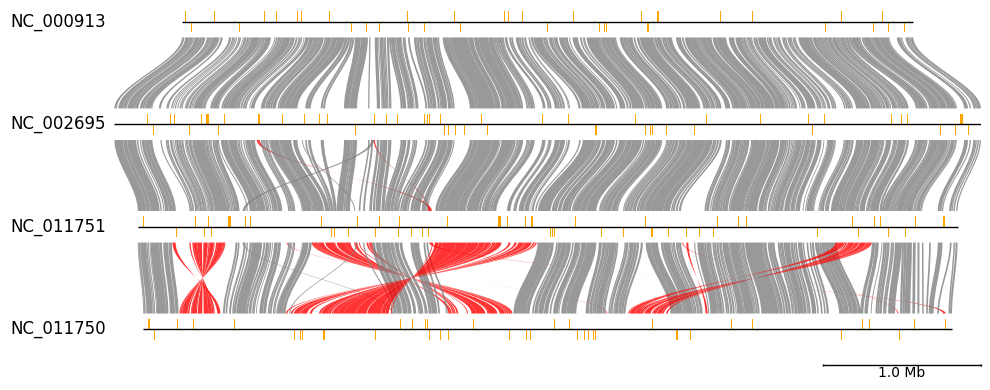

In [5]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=10,
    fig_track_height=0.5,
    feature_track_ratio=0.3,
    tick_track_ratio=0.3,
    align_type="center",
    tick_style="bar",
    tick_labelsize=10,
    # Lowerling 'plot_size_thr' will display more features on track
    # This parameter is used for reducing rendering time of large genome dataset
    # In most cases, displaying all features in large genome will result in bad figure
    plot_size_thr=0.0005,
)

gbk_files, links = load_dataset("escherichia_coli")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=12)
    track.add_genbank_features(gbk, plotstyle="box")

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, curve=True)

fig = gv.plotfig()
